PyTorch Workflow


In [224]:
what_to_cover={1:"data(prepare and load)",
               2:"build model",
               3:"fitting the model to data(training)",
               4:"making predictions and evaluting a model (inference),",
               5:"saving and loading a model",
               6:"putting it all together"}
what_to_cover


{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluting a model (inference),',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [225]:
import torch
from torch import nn #nn contains all of Pytorch buildblock
import matplotlib.pyplot as plt

#check for version

torch.__version__

'2.1.0+cu121'



1.  Data(preparing and loading)

Data can be almost anything... in machine learning

*Excel speadsheet
*Images of any kind
*Videos etc

Machine learning is a game of two parts
1.Get data into a numerical represenation .   
2.Build a model to learn pattern in that numerical presenation





In [226]:
#create know parameter
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X + bias

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [227]:
len(X),len(y)

(50, 50)

###Splitting data into training and test sets(one of the most important concept in machine learning in general)

In [228]:
#create train/test split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [229]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

how might we better visualize our data?
This is where the data explorer's motto comes in!
"visalize, visualize, visualize

In [230]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  plots training data, test data and compare predictions.

  """
  plt.figure(figsize=(10,7))

  #plot training data in blue

  plt.scatter( train_data,train_labels,c="b", s=4, label="Training data")

  #plot test data in green

  plt.scatter(test_data,test_labels, c="g", s=4, label="Testing  data")

  #Are there prediction?
  if predictions is not None:
    #plot the prediction if they exist
    plt.scatter(test_data,predictions, c="r" ,s =4 ,label="Predictions")

  #show the legend
  plt.legend(prop={"size":14})

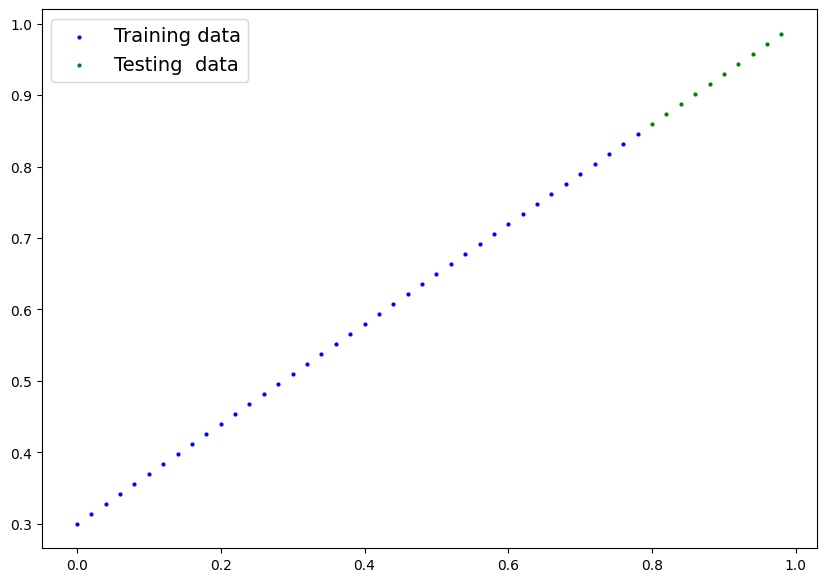

In [231]:
plot_prediction()

Build model

What our model does:


1.   Start with random values(weight & bias)
2.   Look at training data and adjust the random values to better represent(or get closer to) the ideal values

How does  it do so?. Through two main algorithms


1.   Gradient descent
2.   BackPropagation





In [232]:
#create linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

  #forword methos to define the computation in the model
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias


**PyTorch model building essentials**


*   torch.nn-conatins all the buildings for computational graphs( a neural network can be considered a computational graph)
*   torch.nn.Parameter -what parameters should our model try and learn, often a pyTorch layer from torch.nn will set these for us
*   torch.nn.Module-the base class fro all neural network modules , if you subclass it, you should overwrite forword()
*   torch.optim -this whare the optimizers is pyTorch live, they will help gradient descent
*def forword()- All nn,Module subclasses require you to overwrite forword(), this method defines what happens inthe forward computation






In [233]:
#Checking the contents of our PyTorch model

#Create a random seed
torch.manual_seed(42)

#Create an instance of the model(this is a subclass of nn.Module)
model_0=LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [234]:
#List named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**Making prediction using torch.inference_model()**
To check our model's predicitve power, lets see how well it predicts y_test based x_test
When we pass data through our model, its going to run through the forward() method

In [235]:
#Make predictions with model
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [236]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

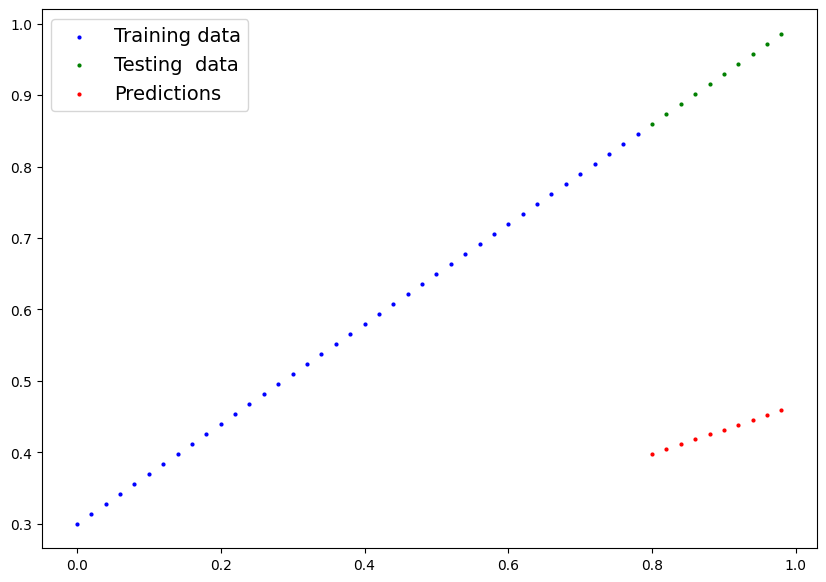

In [237]:
plot_prediction(predictions=y_preds)

**Train model**
The whole idea of training is for a model to move from some (unknown) parameters (these may be random) to some (known) parameter.

or in other words from a poor represenation of data to better representation

one way to measure how poor or how wrong your models predictions are is to use a loss function.

**Not:Loss function** may also be called cost function or criterion in defferent area. For our case , were going to refer to it as a loss function
things we need to train

**loss Function:** A function to measure how wrong your model's presentation are to the ideal outputs, lower is better

**Optimizer:** Takes into account the loss of model and adjusts the model's parameter(eg weight and bias values) in this case to improve the loss function.

And specifically for pyTorch , we need:

A training loop

Atesting loop

In [238]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [239]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [240]:
#Setup a loss function
loss_fn=nn.L1Loss()

#Setup a optimizer(stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)


**Building  a training loop and testing loop in PyTorch**

A couple of thing we need in a training loop:
0. Loop through the data
1. Forwrd pass (this involves data moving through our model's 'forword()' functions) to make predictions on data- also called forword propagation
2.Calculate the loss(compare forward pass predictions to ground truth labels)
3.optimizer zero grad
4.Loss backward-move backwards through the netwotk to calculate the gradients of each of parameter of the loss(backpropagation)
4.Optimizer step-use the optimizer to adjust our model's parameter to try and improve the loss(gradient descendent)

In [241]:

#An epch is loop thrugh the data... (this is hyperpparameter because weve set it)
epochs=100

#Track different value
epoch_count=[]
loss_values=[]
test_loss_values=[]
##Training
#0.loop through the data
for epoch in range(epochs):
  #set model to training mode
  model_0.train()

  #1.forward pass
  y_pred=model_0(X_train)

  #2.Calculate the pass
  loss=loss_fn(y_pred,y_train)
  print(f"Loss:{loss}")
  #3.optimizer zero grad
  optimizer.zero_grad()

  #4.Perform backpropagation on the loss with respect to the parameters of the ,odel
  loss.backward()

  #5.Step the optimizer(perform gradient descent)
  optimizer.step()

  #testing
  model_0.eval()#turns off different setting in the model not needed for evaluation/testing
  with torch.inference_mode(): #turns off gradienttracking & a couple more thing behind the scenes
    #1.Do the forward pass
    test_pred=model_0(X_test)

    #2.Calculate the loss
    test_loss=loss_fn(test_pred,y_test)

  #print out whats happening
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch}|Test:{loss}|Test loss:{test_loss}")
    #print out model state_dict
    print(model_0.state_dict())



Loss:0.31288138031959534
Epoch:0|Test:0.31288138031959534|Test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss:0.3013603389263153
Loss:0.28983935713768005
Loss:0.2783183455467224
Loss:0.26679736375808716
Loss:0.2552763521671295
Loss:0.24375534057617188
Loss:0.23223432898521423
Loss:0.22071333229541779
Loss:0.20919232070446014
Loss:0.1976713240146637
Epoch:10|Test:0.1976713240146637|Test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss:0.18615034222602844
Loss:0.1746293306350708
Loss:0.16310831904411316
Loss:0.1515873372554779
Loss:0.14006635546684265
Loss:0.1285453587770462
Loss:0.11702437698841095
Loss:0.1060912236571312
Loss:0.09681284427642822
Loss:0.08908725529909134
Epoch:20|Test:0.08908725529909134|Test loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss:0.08227583020925522
Loss:0.07638873159885406
Loss:0.07160007208585739


In [242]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647)])

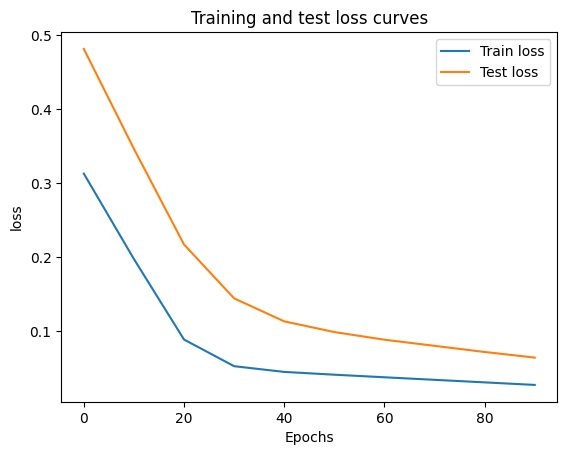

In [250]:
#plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count,test_loss_values,label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()

In [251]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [252]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [253]:
weight,bias

(0.7, 0.3)

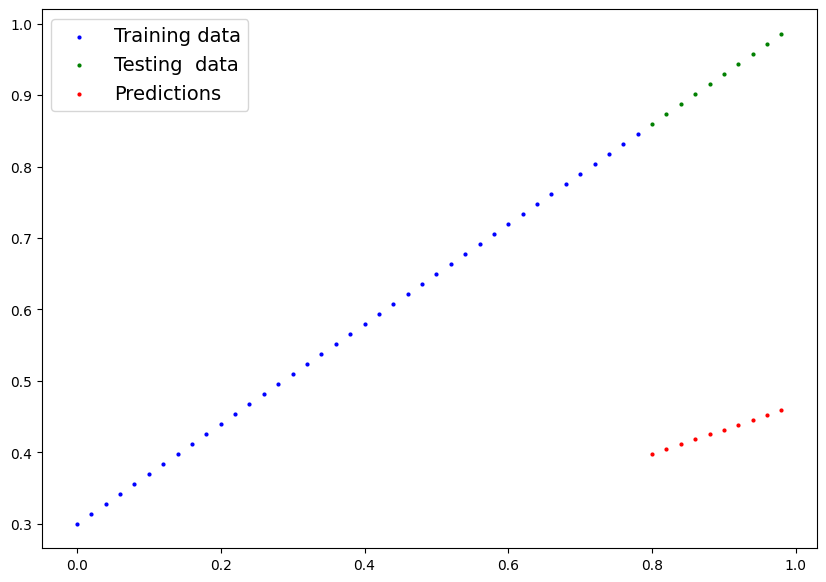

In [254]:
plot_prediction(predictions=y_preds)

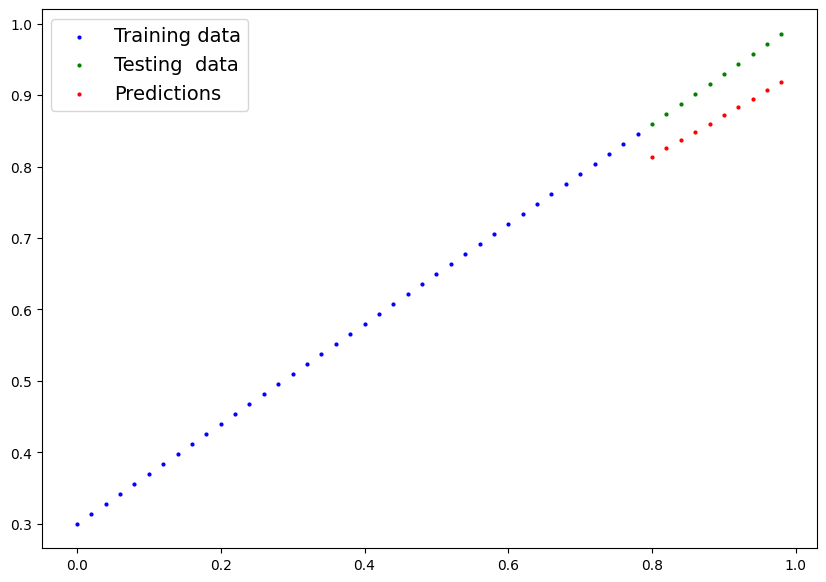

In [255]:
plot_prediction(predictions=y_preds_new)

**Saving a model in PyTorch**
There are three main methods you should about for saving and loading models in PyTorch

1.'torch.save()' -allows you save a PyTorch object in Python's pickle format

2.'torch.load()' -allow you load a saved PyTorch object

3.'torch.nn.Moule.load_staste_dict()'-this allows to load a model's a saved state dictionary

In [258]:
#Saving a PyTorch model
from pathlib import Path

#create the model directory
MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save path
MODEL_NAME="model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to:models/model.pth


***Load the model***

In [259]:
loaded_model_0=LinearRegressionModel() #initiate new instance of a model

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [260]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [261]:
#make some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
#C